In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-08 17:23:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   116MB/s    in 0.6s    

2021-02-08 17:23:53 (116 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
classifier = Sequential()
#First layer
classifier.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Dropout(0.2))
#Second layer
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Dropout(0.2))
#Third layer
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Dropout(0.2))
#Fourth layer
classifier.add(Conv2D(128,(3,3),activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Dropout(0.2))
#Flattening
classifier.add(Flatten())
#Adding DNN
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
#Cheacking the classifier details
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)       

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(128,128),
                                            batch_size=20,
                                            class_mode='binary')
validation_generator = test.flow_from_directory(validation_dir,
                                            target_size=(128,128),
                                            batch_size=20,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = classifier.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 8s - loss: 0.7358 - accuracy: 0.5090 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/15
100/100 - 8s - loss: 0.7043 - accuracy: 0.5445 - val_loss: 0.6880 - val_accuracy: 0.5340
Epoch 3/15
100/100 - 7s - loss: 0.6660 - accuracy: 0.6100 - val_loss: 0.7184 - val_accuracy: 0.5800
Epoch 4/15
100/100 - 7s - loss: 0.6361 - accuracy: 0.6620 - val_loss: 0.6117 - val_accuracy: 0.6800
Epoch 5/15
100/100 - 7s - loss: 0.5897 - accuracy: 0.7010 - val_loss: 0.5868 - val_accuracy: 0.6870
Epoch 6/15
100/100 - 7s - loss: 0.5562 - accuracy: 0.7115 - val_loss: 0.5761 - val_accuracy: 0.6920
Epoch 7/15
100/100 - 7s - loss: 0.5290 - accuracy: 0.7500 - val_loss: 0.5782 - val_accuracy: 0.6920
Epoch 8/15
100/100 - 7s - loss: 0.5029 - accuracy: 0.7580 - val_loss: 0.5581 - val_accuracy: 0.7140
Epoch 9/15
100/100 - 8s - loss: 0.4735 - accuracy: 0.7780 - val_loss: 0.5953 - val_accuracy: 0.7160
Epoch 10/15
100/100 - 7s - loss: 0.4371 - accuracy: 0.7915 - val_loss: 0.5735 - val_accuracy: 0.7250

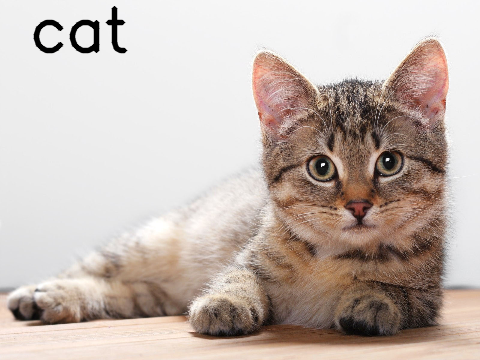

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_img = image.load_img('/content/kitty.jpg',target_size=(128,128))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
if result[0][0]==1:
  prediction = 'dog'
else:
  prediction = 'cat'
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/kitty.jpg')
newImg = cv2.resize(image, (0,0), fx=0.3, fy=0.3)
newImg = cv2.putText(newImg,prediction,(30,50),cv2.FONT_HERSHEY_SIMPLEX,
                     2,(0, 0, 0),4,cv2.LINE_AA)
cv2_imshow(newImg)